In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
import statsmodels.formula.api as sm
import seaborn as sns 

In [2]:
data=pd.read_csv('CarPrice.csv')
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
data.corr()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443


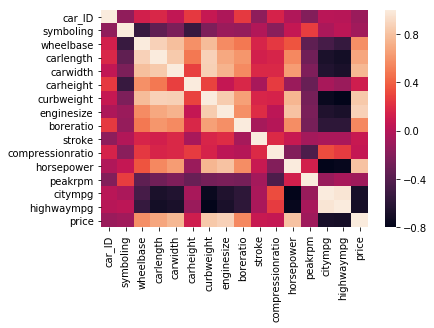

In [4]:
sns.heatmap(data.corr())

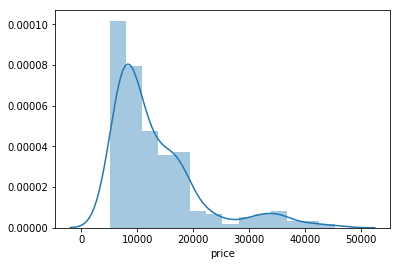

In [5]:
sns.distplot(data["price"])

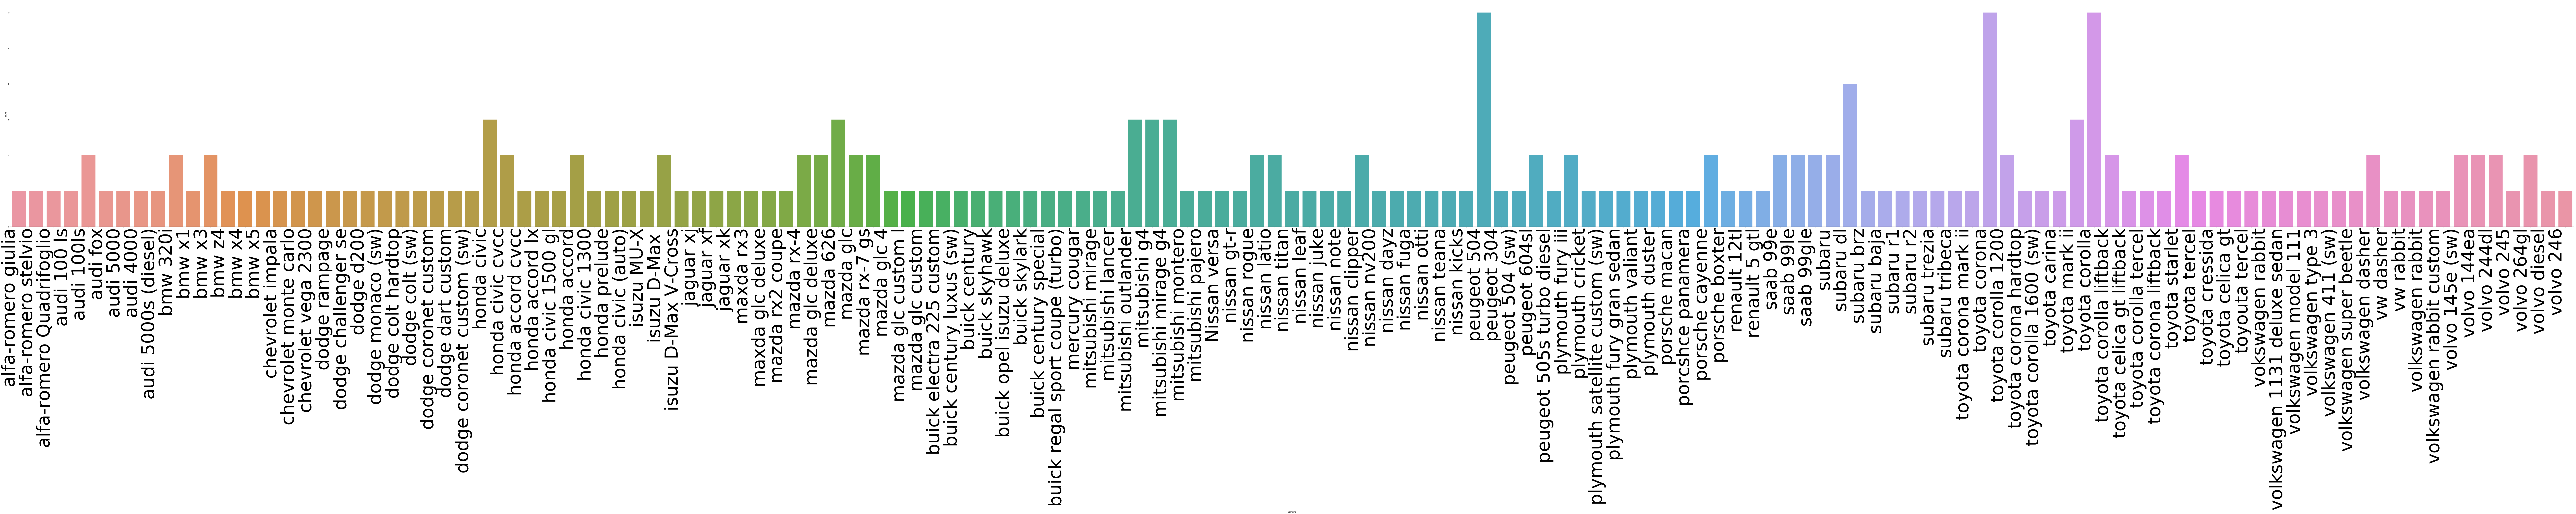

In [6]:
plt.figure(figsize=(200,40))
a=sns.countplot("CarName",data=data)
a.set_xticklabels(a.get_xticklabels(),rotation=90,fontsize=100,ha="right")
plt.tight_layout()
plt.savefig("Most Car")
plt.show()

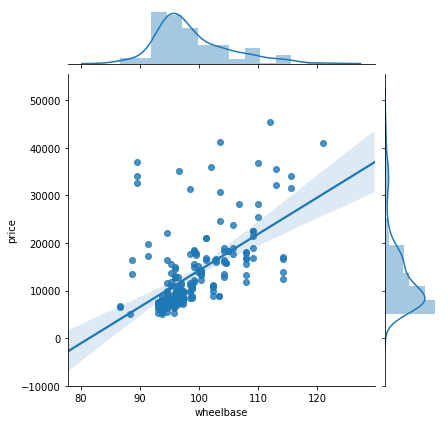

In [7]:
sns.jointplot(x="wheelbase",y="price",data=data,kind="reg")

In [8]:
#sns.pairplot(data)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017062E5FE10>,
      dtype=object)

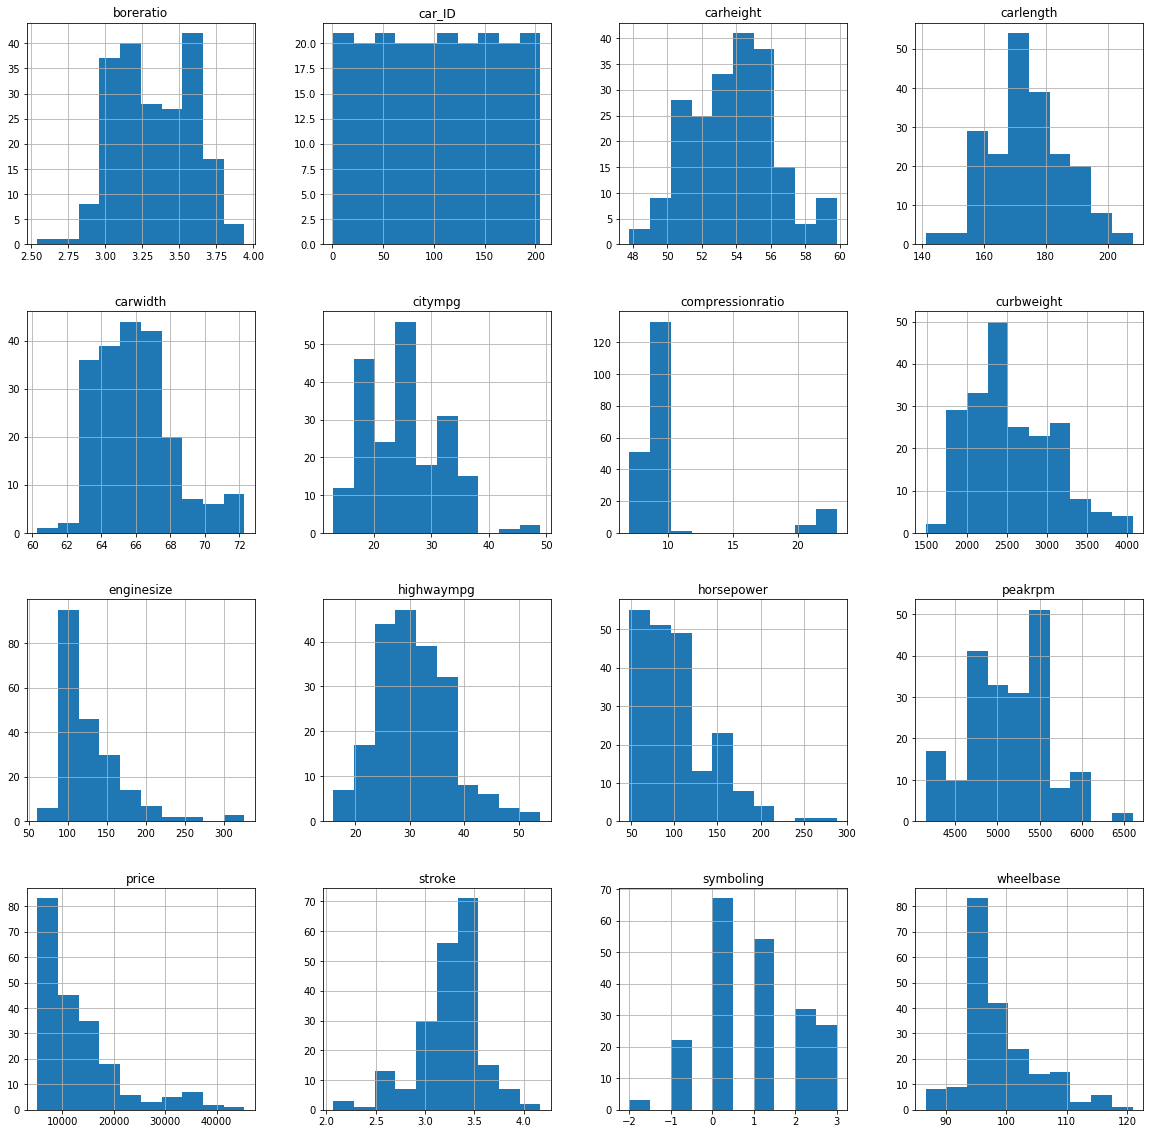

In [9]:
data.hist(figsize=(20,20))

In [10]:
data.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [11]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


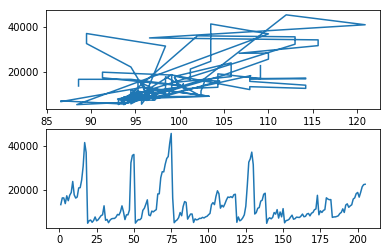

In [12]:
plt.subplot(2,1,1)
plt.plot(data.wheelbase,data.price)
plt.subplot(2,1,2)
plt.plot(data.car_ID,data.price)

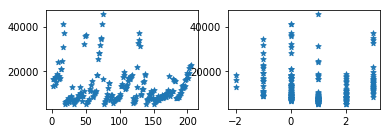

In [13]:
plt.subplot(2,2,1)
plt.scatter(data.car_ID,data.price,label="stars",s=30,marker="*")
plt.subplot(2,2,2)
plt.scatter(data.symboling,data.price,label="stars",s=30,marker="*")

In [14]:
v=data.columns
for i in range(0,26):
    print(v[i],[i])

car_ID [0]
symboling [1]
CarName [2]
fueltype [3]
aspiration [4]
doornumber [5]
carbody [6]
drivewheel [7]
enginelocation [8]
wheelbase [9]
carlength [10]
carwidth [11]
carheight [12]
curbweight [13]
enginetype [14]
cylindernumber [15]
enginesize [16]
fuelsystem [17]
boreratio [18]
stroke [19]
compressionratio [20]
horsepower [21]
peakrpm [22]
citympg [23]
highwaympg [24]
price [25]


In [15]:
data.columns[0:25]

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg'],
      dtype='object')

(array([ 0.,  0.,  0.,  3., 22., 67., 54., 32., 27.,  0.]),
 array([-5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.]),
 <a list of 10 Patch objects>)

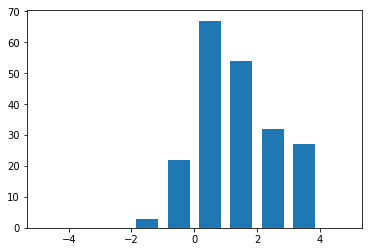

In [16]:
a=data.symboling
bins=10
range=(-5,5)
plt.hist(a,bins,range,histtype='bar',rwidth=0.7)

In [17]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [18]:
real_x=data.iloc[:,0:25].values
real_y=data.iloc[:,25].values

In [19]:
le=LabelEncoder()
real_x[:,2]=le.fit_transform(real_x[:,2])
real_x[:,3]=le.fit_transform(real_x[:,3])
real_x[:,4]=le.fit_transform(real_x[:,4])
real_x[:,5]=le.fit_transform(real_x[:,5])
real_x[:,6]=le.fit_transform(real_x[:,6])
real_x[:,7]=le.fit_transform(real_x[:,7])
real_x[:,8]=le.fit_transform(real_x[:,8])
real_x[:,14]=le.fit_transform(real_x[:,14])
real_x[:,15]=le.fit_transform(real_x[:,15])
real_x[:,17]=le.fit_transform(real_x[:,17])

In [20]:
real_x=real_x[:,1:]

In [21]:
ct=ColumnTransformer([("State",OneHotEncoder(),[2,6,7,14,15,17])],remainder='passthrough')
real_x=ct.fit_transform(real_x)

In [22]:
training_x,test_x,training_y,test_y=train_test_split(real_x,real_y,test_size=0.3,random_state=0)

In [23]:
MLR=LinearRegression()
MLR.fit(training_x,training_y)
pred_y=MLR.predict(test_x)

In [24]:
test_y

array([ 6795. , 15750. , 15250. ,  5151. ,  9995. , 11199. ,  5389. ,
        7898. , 17199. ,  6529. , 20970. , 31400.5, 10945. , 18344. ,
        8916.5,  9989. ,  9295. , 18920. ,  7895. ,  6488. ,  9959. ,
       15580. ,  9895. , 11549. , 15998. ,  5118. ,  6938. , 16695. ,
        8358. ,  5499. ,  7975. , 12290. , 22018. ,  8948. ,  6849. ,
       41315. , 11595. , 18150. ,  6377. , 45400. ,  8916.5, 17450. ,
       34184. , 15040. , 11259. ,  7609. ,  7609. , 14869. , 11694. ,
        8495. , 23875. ,  7099. ,  8058. , 10595. , 16503. , 18399. ,
       10795. , 18420. ,  9960. ,  6229. ,  6479. , 15510. ])

In [25]:
pred_y

array([ 6181.27695802, 21431.93726527, 11879.96735692,  5137.51481717,
       11093.03965257, 11565.43939073,  5475.24652993,  3851.74978421,
       16307.5532681 ,  7546.91800805, 19845.23503458, 37598.75191676,
       12742.36045113,  8530.91316429,  6525.10149713,  9527.2876764 ,
        4839.70073114, 18201.11783881,  9981.55739314,  6341.49295657,
       10551.87444268, 16737.1553826 ,  5657.54108847, 11120.13348228,
       16805.74394897,  9793.5484102 ,  7395.273205  , 17133.4332193 ,
        8772.33238892,  6707.91812043,  8835.41403592, 12281.6922968 ,
       17601.23608301,  9087.40141214,  7486.8354407 , 32200.51944396,
       12090.38515969, 18334.54835098,  5958.05217025, 37442.82256849,
        5454.20514394, 13643.80941717, 32987.67780227, 14571.24666506,
       11817.8586448 ,  4600.73021337,  7056.91827306, 13959.7642943 ,
       11863.9011407 , 10347.52474166, 21692.32196066,  4451.35429871,
        7378.20030411,  9445.28748537, 21182.59104499, 16542.83117628,
      

In [26]:
test_y[0]

6795.0

In [27]:
pred_y[0]

6181.276958015973

In [28]:
MLR.score(training_x,training_y)*100

98.5453378984105

In [29]:
MLR.score(test_x,test_y)*100

86.67106533010926

In [30]:
test_y[50]

23875.0

In [31]:
pred_y[50]

21692.321960659494

In [32]:
print(MLR.score(training_x,training_y)*100)
print(MLR.score(test_x,test_y)*100)

98.5453378984105
86.67106533010926


# Random Forest Algo

In [33]:
from sklearn.ensemble import RandomForestRegressor

In [34]:
real_x=data.iloc[:,[0,1,9,10,11,12,13,16,18,19,20,21,22,23,24]].values
real_y=data.iloc[:,25].values

In [35]:
training_x,test_x,training_y,test_y=train_test_split(real_x,real_y,test_size=0.3,random_state=0)

In [36]:
reg=RandomForestRegressor( n_estimators=300)
reg.fit(training_x,training_y)
y_pred=reg.predict(test_x)

In [37]:
test_y

array([ 6795. , 15750. , 15250. ,  5151. ,  9995. , 11199. ,  5389. ,
        7898. , 17199. ,  6529. , 20970. , 31400.5, 10945. , 18344. ,
        8916.5,  9989. ,  9295. , 18920. ,  7895. ,  6488. ,  9959. ,
       15580. ,  9895. , 11549. , 15998. ,  5118. ,  6938. , 16695. ,
        8358. ,  5499. ,  7975. , 12290. , 22018. ,  8948. ,  6849. ,
       41315. , 11595. , 18150. ,  6377. , 45400. ,  8916.5, 17450. ,
       34184. , 15040. , 11259. ,  7609. ,  7609. , 14869. , 11694. ,
        8495. , 23875. ,  7099. ,  8058. , 10595. , 16503. , 18399. ,
       10795. , 18420. ,  9960. ,  6229. ,  6479. , 15510. ])

In [38]:
y_pred

array([ 6153.51666667, 16194.23222667, 14386.31056333,  5791.39      ,
        9627.92      , 14215.55      ,  5895.59      ,  7397.24      ,
       17718.88334667,  6817.91      , 19123.73      , 36168.36      ,
       12415.94666667, 13958.85722333,  6255.14666667, 13479.12333333,
       12570.26722333, 17487.03168333,  8650.83666667,  6549.54333333,
        9362.33333333, 13799.44333333, 10527.96333333, 14322.61666667,
       17374.33723667,  7321.54666667,  7540.97333333, 15319.63666667,
        8045.18666667,  6852.28333333,  8461.64333333, 12895.14945   ,
       15530.95167   , 10001.87333333,  7082.69      , 32438.04722333,
        9423.95333333, 16496.93111333,  6031.59666667, 37584.49333333,
        6125.63333333, 15592.29614333, 34874.48      , 12755.83666667,
       10070.62333333,  7734.41666667,  6617.42333333, 13974.15389   ,
       13223.84333333,  8613.96666667, 17845.38006667,  7186.87666667,
        8444.63333333,  9019.04333333, 17569.61556667, 17560.72112667,
      

In [39]:
test_y[0]

6795.0

In [40]:
y_pred[0]

6153.516666666666

In [41]:
print(reg.score(training_x,training_y)*100)
print(reg.score(test_x,test_y)*100)

99.09412437224529
90.7710570738327


In [47]:
test_y[41]

17450.0

In [48]:
y_pred[41]

15592.296143333331

In [49]:
pred_y[41]

13643.809417172

C:\Users\VishalSharma\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


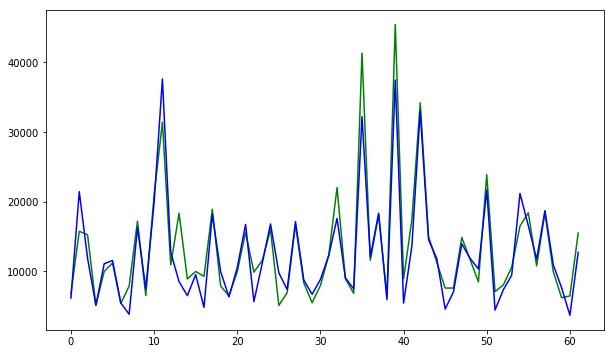

In [45]:
plt.figure(figsize=(10,20))
plt.subplot(3,1,1)
plt.plot(test_y,color="green")
plt.subplot(3,1,1)
plt.plot(pred_y,color="blue")



C:\Users\VishalSharma\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


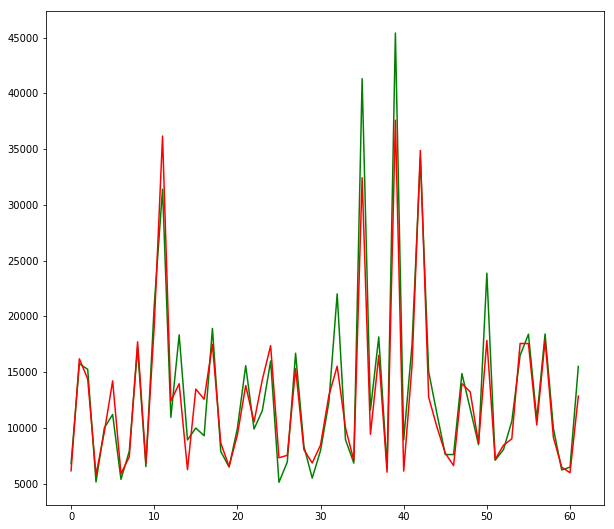

In [46]:
plt.figure(figsize=(10,20))
plt.subplot(2,1,1)
plt.plot(test_y,color="green")
plt.subplot(2,1,1)
plt.plot(y_pred,color="red")